### Answers to Questions:

1: Yes they all show a strong linear relationship and would be good candidates for linear regression.

2: See Regression Below

3:  1. Page Likes
    2. Post Engagement
    3. Post Shares

In [1]:
#Getting the notebook ready and getting the dtata from the URL
!pip install arrow
!pip install numpy 
!pip install statsmodels #--upgrade git+https://github.com/statsmodels/statsmodels

import numpy as np
import statsmodels.api as sm
import arrow
import calendar
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

DATA_URL = 'http://128.138.93.164/aprd6342/data/TravelPonyFacebook.csv (Links to an external site.)'
df = pd.read_csv(DATA_URL)

list(df)

     |████████████████████████████████| 51kB 2.4MB/s eta 0:00:011


URLError: <urlopen error [Errno 110] Connection timed out>

In [ ]:
#Creating a dataframe subset excluding the amount spent where they =0
tempAmtgt0 = df[(df['Amount Spent (USD)'] != 0)]
print(tempAmtgt0)


      Start Date  ... Cost per Page Engagement (USD)
0     2013-12-02  ...                       1.219512
1     2013-12-01  ...                       1.395349
2     2013-11-30  ...                       1.190476
3     2013-11-29  ...                       1.167315
4     2013-11-22  ...                       2.512857
...          ...  ...                            ...
3700  2013-06-11  ...                       1.050000
3701  2013-06-10  ...                       0.533333
3702  2013-06-09  ...                       0.990000
3703  2013-06-08  ...                       0.316667
3704  2013-06-07  ...                       0.000000

[1802 rows x 20 columns]


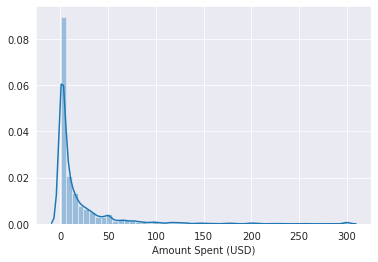

In [ ]:
#Setting the style and ploting the amount spent
sns.set_style('darkgrid')
sns.distplot(tempAmtgt0["Amount Spent (USD)"])

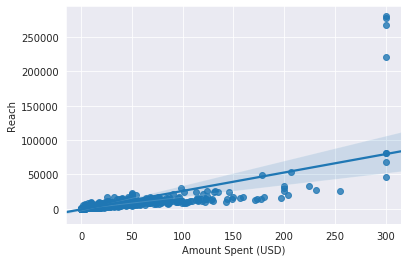

In [ ]:
#Ploting the amount spent vs reach
sns.regplot(x=tempAmtgt0['Amount Spent (USD)'], y=tempAmtgt0['Reach'])


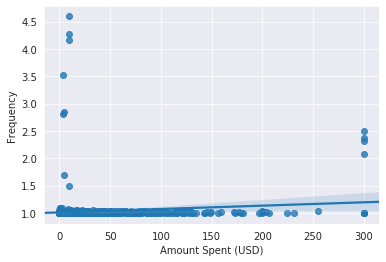

In [ ]:
#Ploting the amount spent vs Frequency
sns.regplot(x=tempAmtgt0['Amount Spent (USD)'], y=tempAmtgt0['Frequency'])


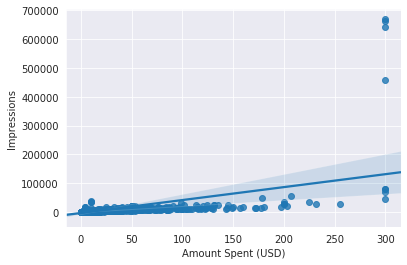

In [ ]:
#Ploting the amount spent vs impressions
sns.regplot(x=tempAmtgt0['Amount Spent (USD)'], y=tempAmtgt0['Impressions'])

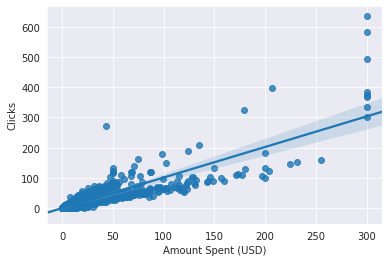

In [ ]:
#Plotting the amount spent vs clicks.
sns.regplot(x=tempAmtgt0['Amount Spent (USD)'], y=tempAmtgt0['Clicks'])

In [ ]:
#Running multiple OLS at once and finding their coefficients of multiple variables at the same time.
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
tempAmtgt0['Campaign Name'] = lb_make.fit_transform(tempAmtgt0['Campaign Name'])

X = tempAmtgt0[['Campaign Name', 'Reach', 'Frequency', 'Impressions', 'Clicks', 'Unique Clicks', 'Page Likes', 'Page Engagement', 'Post Engagement', 'Post Likes', 'Post Comments', 'Post Shares', 'Photo Views', 'Website Clicks']]
y = tempAmtgt0['Amount Spent (USD)']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Amount Spent (USD)   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              2211.
Date:                Thu, 21 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:28:35   Log-Likelihood:                         -6605.9
No. Observations:                1802   AIC:                                  1.324e+04
Df Residuals:                    1789   BIC:                                  1.331e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Campaign Name       0.0109      0.002      4.908      0.000       0.007       0.015
Reach               0.0034      0.000     22.479      0.000       0.003       0.004
Frequency          -2.7259      0.510     -5.341      0.000      -3.727      -1.725
Impressions        -0.0012   5.82e-05    -20.650      0.000      -0.001      -0.001
Clicks             -0.1577      0.112     -1.410      0.159      -0.377       0.062
Unique Clicks       0.3058      0.127      2.413      0.016       0.057       0.554
Page Likes         23.0569      9.517      2.423      0.016       4.391      41.722
Page Engagement   -19.7428      9.513     -2.075      0.038     -38.401      -1.084
Post Engagement    16.7998      7.929      2.119      0.034       1.250      32.350
Post Likes          2.3358      1.591      1.469      0.142      -0.784       5.455
Post Comments       3.4252      1.654      2.071      0.038       0.182       6.669
Post Shares         4.5029      1.614      2.790      0.005       1.338       7.668
Photo Views         3.1634      1.589      1.991      0.047       0.047       6.279
Website Clicks      3.3725      1.589      2.123      0.034       0.256       6.489
==============================================================================
Omnibus:                      926.260   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27449.152
Skew:                           1.822   Prob(JB):                         0.00
Kurtosis:                      21.770   Cond. No.                     3.41e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""